# K Nearest Neighbours

 * Animation of KNN
 * Used to generate images for slides

## Load

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

Load in a dataset
 * Should have numerical features
 * Labeled (supervised)

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
dataset_name = "IRIS"

KNN works in arbitrary dimensions, but to visualise it we need to drop down to two. Using Linear Discrimant Analysis (LDA) we can find the best two dimensions to separate the classes, i.e., the best direction to view the data so that the classes are separated as much as possible.

In [51]:
# drop down to 2D so we can visualise KNN
if False:
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

    lda = LinearDiscriminantAnalysis(n_components=2)
    X = lda.fit_transform(X, y)
    axis_labels = None
else:
    X = X[:,:2]
    axis_labels = ["Sepal length (cm)", "Sepal width (cm)"]

FOR YOU: Lookup up discriminant analysis online? How is it similiar to and how is it different to classification?

Scaling features is necessary before KNN to avoid undue influence by the dominant features.

In [52]:
# scale features (to mean=0, std=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

randomize the order observation order - for later visualisation

In [53]:
np.random.seed(42)
idx = np.random.permutation(range(len(y)))
X, y = X[idx], y[idx]

The following provides an interact means of trying out various settings,
using GUI controls like sliders, etc.

In [54]:
import ipywidgets as widgets
import matplotlib.patches as mpatches
from collections import Counter

n = X.shape[0]
n_classes = len(target_names)

markers = ['^', 's', '*']
colors =   ['#377eb8', '#4daf4a', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

m = widgets.IntSlider(value=10, min=1, max=n-1, step=1)
k = widgets.IntSlider(value=1, min=1, max=20, step=1)
summary = widgets.Textarea(value='', layout={'height':'150px', 'width': 'auto'}, disabled=False)
ui = widgets.VBox([
    widgets.HBox([
        widgets.VBox([widgets.Label('Number of observations in train set: $m$'), m]),
        widgets.VBox([widgets.Label('Number of neighbours: $k$'), k])
    ]),
    summary])

Prepare a utility function `f` to draw a typical setup, settings controlled by input parameters

In [55]:
def f(m,k, show_fig=True, save_fig=False, show_region=True, size=100):
    
    global summary
    
    message = ""
    if k>m:
        message += f"Reducing k to {m}, since number of neighbours cannot be bigger than number of observation in train set.\n"
        k = m
    
    # train set consists of first m observations
    X_train, y_train = X[:m], y[:m]

    # new observation is (m+1)(th) observation
    x_new =  X[m]

    # compute distances from new point to all others in train
    distances = np.linalg.norm(X_train - x_new,axis=1)
    neighbours = sorted(zip(distances,y_train), key=lambda x: x[0])

    # get min radius to reach k nearest neighbours 
    radius = neighbours[k-1][0]

    message +=  f"Location of new observation is ({x_new[0]:.2f}, {x_new[1]:.2f})\n" \
        f"Radius needed to reach {k} nearest neighbours = {radius:.2f}"
    message += "\nCounting neighbours ..."
    counts = Counter([a[1] for a in neighbours[:k]])
    max_count = max([v for _,v in counts.items()])
    max_class = [c for c,v in counts.items() if v==max_count]
    
    for i in range(n_classes):
         message += f"\n\t{target_names[i]:20s} {counts[i]:3d} {'MAX' if i in max_class else ''}"
    if len(max_class)==1:
        message += f"\n{k} nearest neighours suggests that new observation should be in class '{target_names[max_class[0]]}'."
    else:
        message += f"\nHave tie in {k} nearest neighours, reduce k by one and rerun."
    # comment on unsafe k
    if k % n_classes==0:
        message += f"\nNote: Number of neighbours k={k} should not be a multiple of number of classes = {n_classes}."
    
    if show_fig or save_fig:
        fig, ax = plt.subplots(1,1,figsize=(8,8))
    
        # add a circle
        if show_region:
            circle = plt.Circle(x_new, radius, color='r', alpha=0.2)
            ax.add_patch(circle)
        
        for i in range(n_classes):
            plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], s=size, marker=markers[i], alpha=.8, color=colors[i],  label=target_names[i])
        plt.scatter(x_new[0], x_new[1], marker='$?$', s=size, alpha=.8, color='red')

        plt.legend(loc='lower left', shadow=False, scatterpoints=1, frameon=True)
        #plt.axis('equal')
        plt.ylim(-2.6,2.6)
        plt.xlim(-2.6,2.6)
        if axis_labels is not None:
            plt.xlabel(axis_labels[0])
            plt.ylabel(axis_labels[1])
        plt.title(f'{dataset_name} dataset (m={m}, k={k})');

    summary.value = message
        
    if save_fig:
        filename = f"output/knn_{dataset_name}_{m}_{k}_{int(show_region)}.pdf"
        plt.savefig(filename, bbox_inches="tight")
    if not show_fig: plt.close()

    return {"X_train":X_train, "y_train":y_train, "x_new":x_new, "distances": distances, "counts": counts}

Now apply the interactive widget to f (to choose its input argument values)

In [56]:
out = widgets.interactive_output(f, {'m': m, 'k': k})
display(ui, out)

Output()

## Visualising KNN in action

FileNotFoundError: [Errno 2] No such file or directory: 'output/knn_IRIS_26_1_0.pdf'

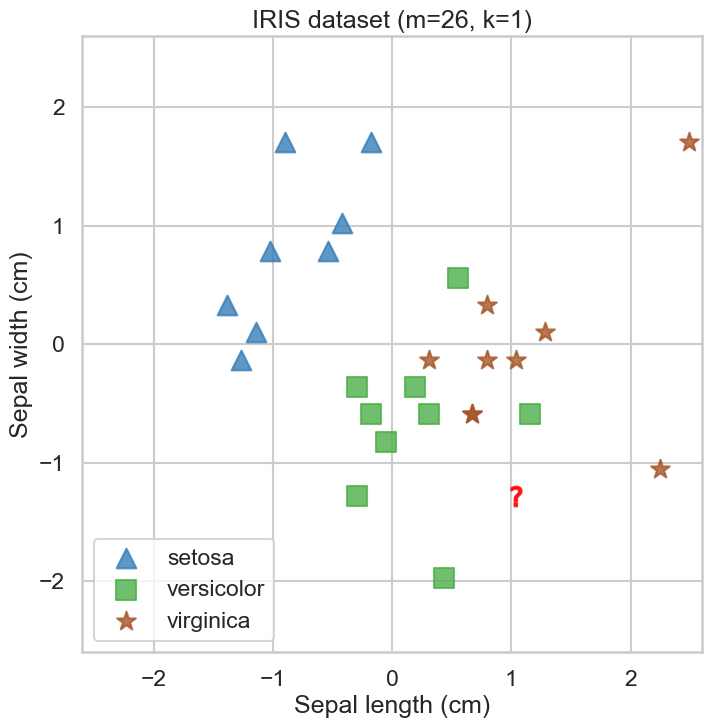

In [57]:
f(26,1, show_fig=1, save_fig=1, show_region=0, size=200);
f(26,1, show_fig=0, save_fig=1, show_region=0, size=200);
f(26,1, show_fig=0, save_fig=1, show_region=1, size=200);
f(26,3, show_fig=0, save_fig=1, show_region=1, size=200);
f(26,5, show_fig=0, save_fig=1, show_region=1, size=200);
f(26,7, show_fig=0, save_fig=1, show_region=1, size=200);
f(26,9, show_fig=0, save_fig=1, show_region=1, size=200);

## Decision Boundaries

In [ ]:
# First import KNN and the iris data (which is one of the standard datasets provided with sklearn) and prepare it for analysis

In [58]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
dataset_name = "IRIS"
X, y, target_names = iris.data[:, :2], iris.target, iris.target_names

Choose paler colours (`cmap_light`) for the regions, and strong colours (`cmap_bold`) for the data itself.

In [59]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

The `decision_boundaries` function gathers together the steps needed to display the decision boundaries on a 100x100 mesh grid 

In [61]:
def decision_boundaries(k, show_fig=True):

#
# Create the nearest neighbors classifier object for a specific k number of neighbors
# Then apply it to the data X (sepal length and width) and y (iris labels)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

#
# Layout a rectangular 100x100 grid that covers the entire range of the training data, leaving a margin of 0.1 on each boundary
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

#
# Looping over the mesh grid points, apply the knn model to predict the label for each grid point 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#
# Now colour each grid point based on its prediced label (0,1,2), which picks out the relevant colour from the cmap_light colour map.
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

#
# Looping over the 3 labels...
#   Overlay a plot of the relevant training set data points, using its own `marker` symbol and colour (from the `cmap_bold` colour map)
#   Add labels and a title
#   Save the figure, using a filename that is generated based on variables like `dataset_name` and `k`
    for i in range(3):
        plt.scatter(X[y==i,0], X[y==i, 1], c=['#FF0000', '#00FF00', '#0000FF'][i], marker=markers[i])
        plt.xlabel('sepal length (cm)')
        plt.ylabel('sepal width (cm)')
        plt.title(f"{dataset_name} k-NN decision boundaries ($k={k}$)")
        plt.axis('tight')
        plt.savefig(f"output/knn_{dataset_name}_decision_boundary_{k}.pdf")
# The following code is commented out because it does not seem to work with the notebook_exporter
#        if show_fig:
#            plt.show()
# Actually we don't need this anyway, so we can comment it out
#        plt.show()
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'output/knn_IRIS_decision_boundary_1.pdf'

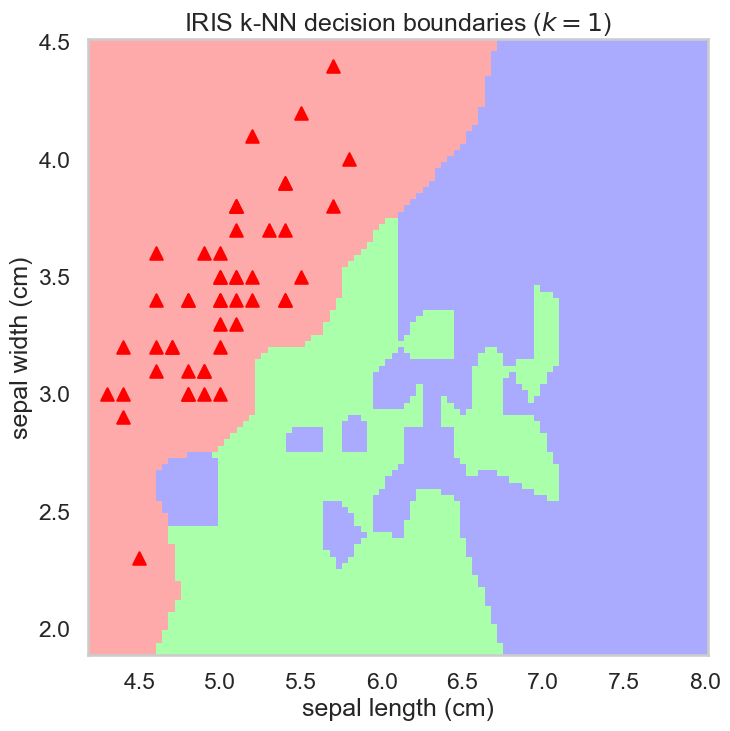

In [62]:
for k in [1,3,5,7,17]:
    decision_boundaries(k,show_fig=False)

FOR YOU: What happens to the decision boundaries as k increases? How might you find an optimal value of k?